In [1]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv("Admission_Predict.csv")

In [4]:
df = df.drop(["Serial No."], axis = 1)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### No missing data

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


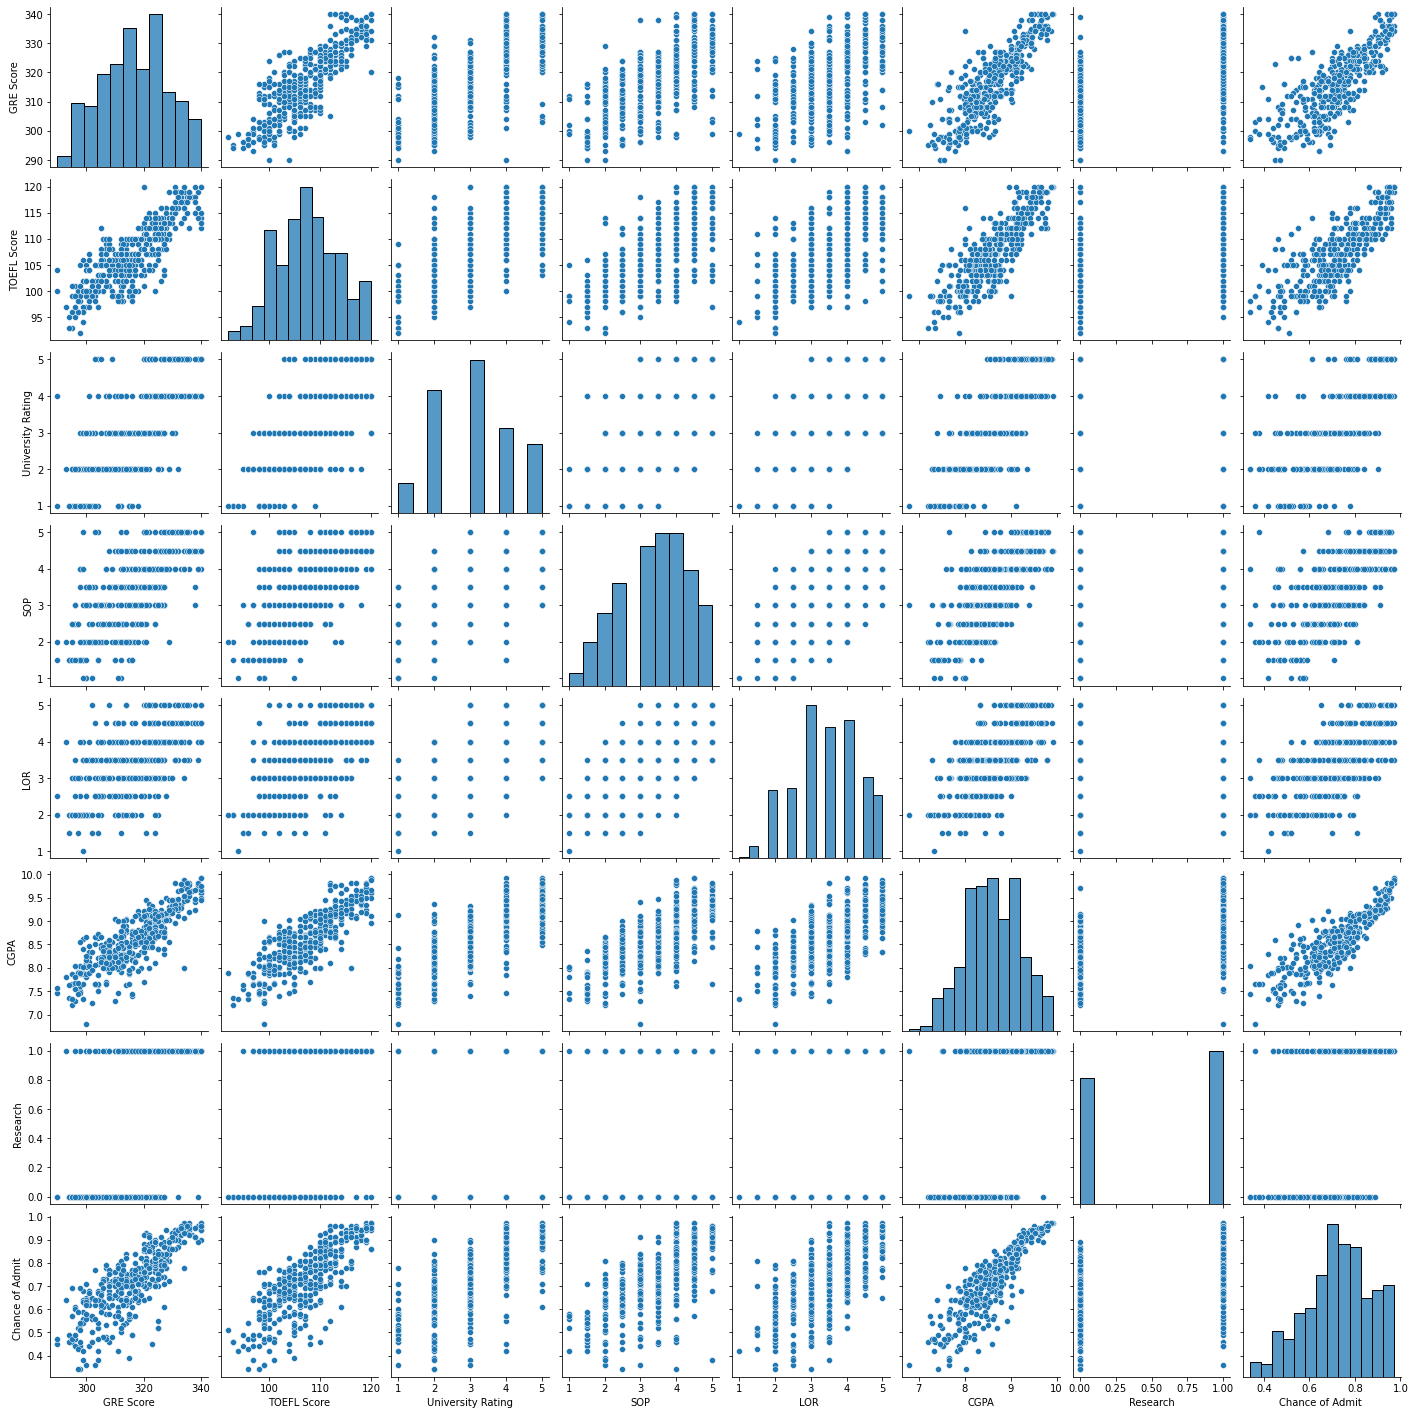

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


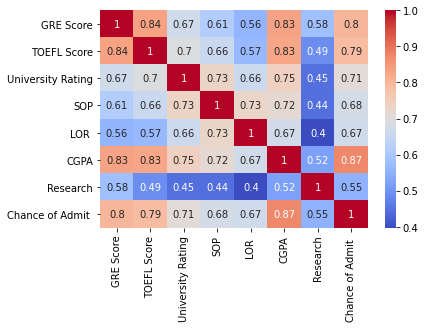

In [11]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

### from the corr, we can see that the chance of admission depends on all the features as they all have strong positive correlation with the target variable, but CGPA feature has more correlation. Therefore, we will  not be dropping any of the features

### ...
### ....

### To check each of the features and see how they are distributed

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
# # plt.figure(figsize= (8, ))

# plt.subplot(1,7,1)
# plt.hist(df["GRE Score"])
# plt.xlabel("GRE Score")

# plt.subplot(1,7,2)
# plt.hist(df["TOEFL Score"])
# plt.xlabel("TOEFL Score")

# # plt.subplot(7,1,2)
# # plt.hist(df["TOEFL Score"])
# # plt.xlabel("TOEFL Score")

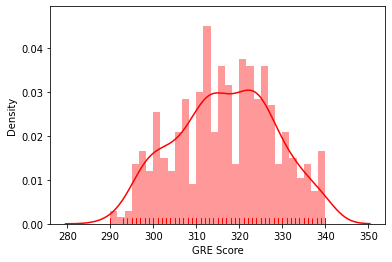

In [14]:
sns.distplot(df["GRE Score"], bins = 30, color = "r", rug = True )

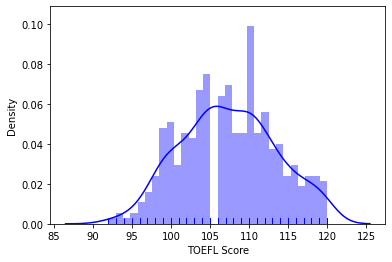

In [15]:
sns.distplot(df["TOEFL Score"], bins = 30, color = "b", rug = True )

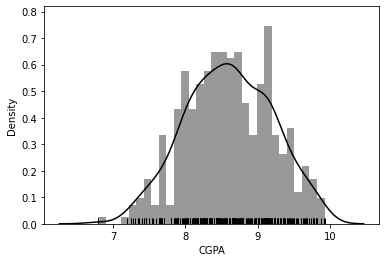

In [16]:
sns.distplot(df["CGPA"], bins = 30, color = "k", rug = True )

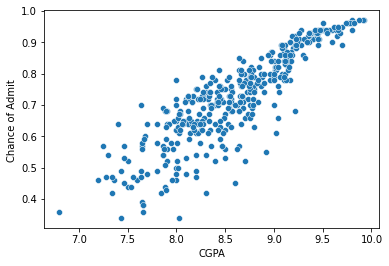

In [17]:
sns.scatterplot(x = "CGPA", y = 'Chance of Admit ', data = df)

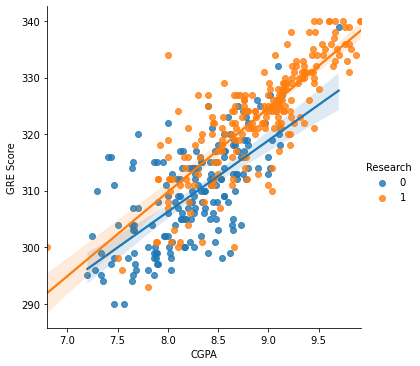

In [18]:
sns.lmplot(x ="CGPA", y = 'GRE Score', data = df, hue = "Research")

### This shows that the higher the CGPA, the higher your chances of gaining admission

### ......................

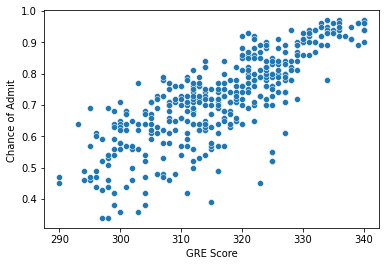

In [19]:
sns.scatterplot(x = "GRE Score", y = 'Chance of Admit ', data = df)

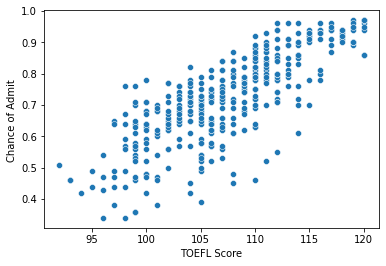

In [20]:
sns.scatterplot(x = "TOEFL Score", y = 'Chance of Admit ', data = df, )

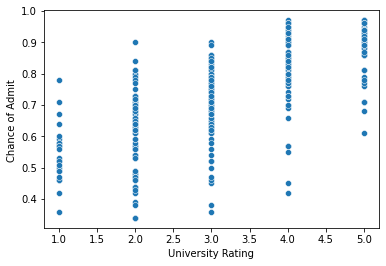

In [21]:
sns.scatterplot(x = "University Rating", y = 'Chance of Admit ', data = df, )

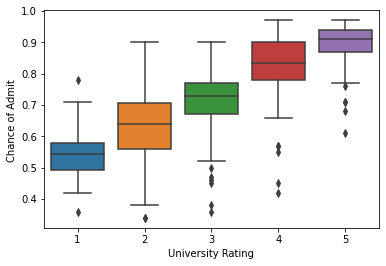

In [22]:
sns.boxplot(x = "University Rating", y = 'Chance of Admit ', data = df)

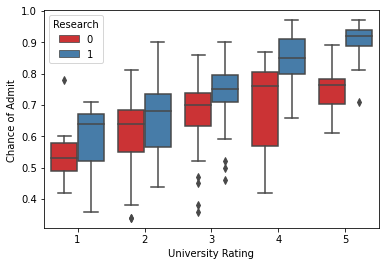

In [23]:
sns.boxplot(x = "University Rating", y = 'Chance of Admit ', data = df, hue = "Research", palette='Set1')

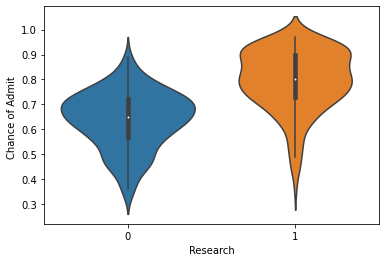

In [24]:
sns.violinplot(x = "Research", y = 'Chance of Admit ', data = df, )

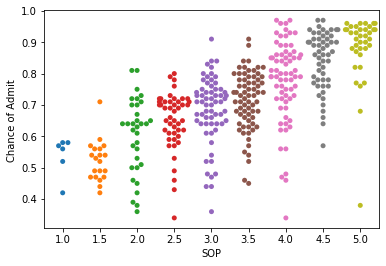

In [25]:
sns.swarmplot(x = "SOP", y = 'Chance of Admit ', data = df, )

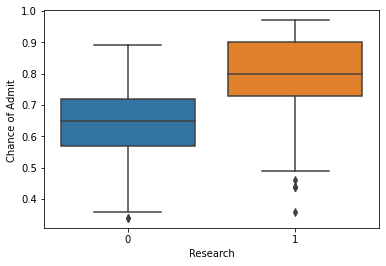

In [26]:

sns.boxplot(data= df, x = 'Research', y = 'Chance of Admit ')

## From here, we can see that research is also a plus factor in getting admission